In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split



In [2]:
df = pd.read_csv("D:/cellula internship/final_internship_data.csv")

In [3]:
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [5]:
df.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358361,-1.265712,0.696740,-1.265755,0.696675,1.683428,13.510834,15.684206,6.268650,3.042008,2011.739132,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916617,0.206941,0.140909,0.205903,0.128997,1.307395,6.511571,8.681066,3.437815,1.949240,1.860889,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


In [6]:
df.isnull().sum().sort_values(ascending=False)

bearing              5
distance             5
nyc_dist             5
sol_dist             5
lga_dist             5
ewr_dist             5
jfk_dist             5
dropoff_longitude    5
dropoff_latitude     5
hour                 0
year                 0
weekday              0
month                0
day                  0
User ID              0
User Name            0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
fare_amount          0
key                  0
Traffic Condition    0
Weather              0
Car Condition        0
Driver Name          0
passenger_count      0
dtype: int64

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


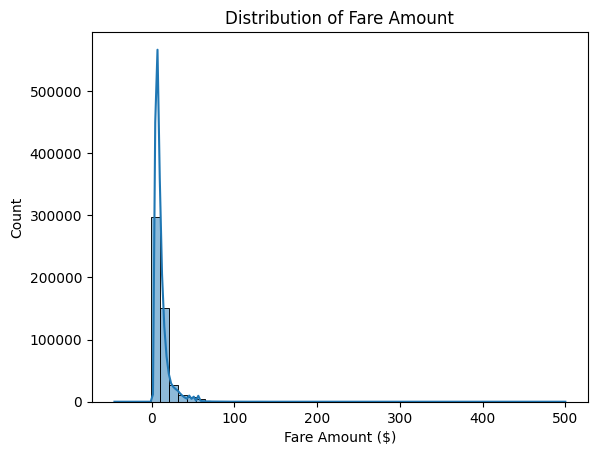

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["fare_amount"], bins=50, kde=True)
plt.title("Distribution of Fare Amount")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Count")
plt.show()


In [10]:
df = df[df["fare_amount"] > 0]


c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


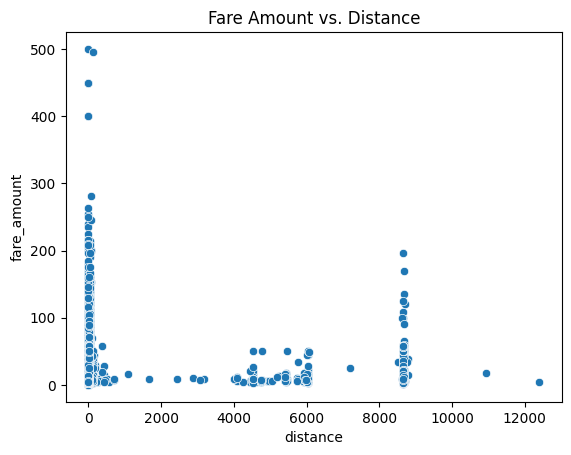

In [11]:
sns.scatterplot(x="distance", y="fare_amount", data=df)
plt.title("Fare Amount vs. Distance")
plt.show()

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

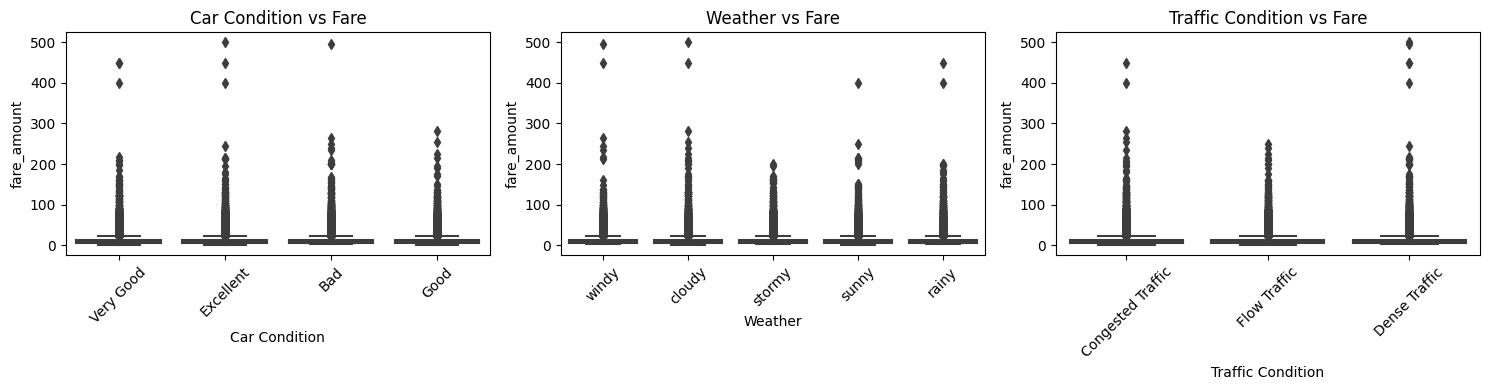

In [12]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x="Car Condition", y="fare_amount", data=df)
plt.xticks(rotation=45)
plt.title("Car Condition vs Fare")

plt.subplot(1, 3, 2)
sns.boxplot(x="Weather", y="fare_amount", data=df)
plt.xticks(rotation=45)
plt.title("Weather vs Fare")

plt.subplot(1, 3, 3)
sns.boxplot(x="Traffic Condition", y="fare_amount", data=df)
plt.xticks(rotation=45)
plt.title("Traffic Condition vs Fare")

plt.tight_layout()
plt.show()


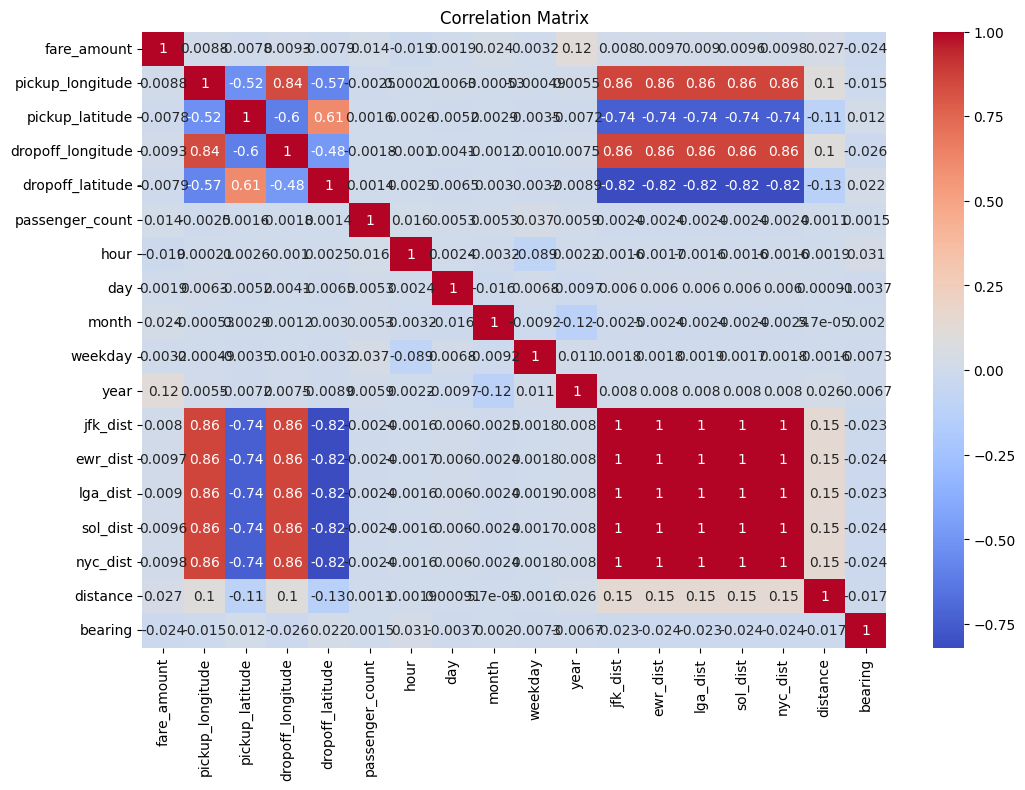

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

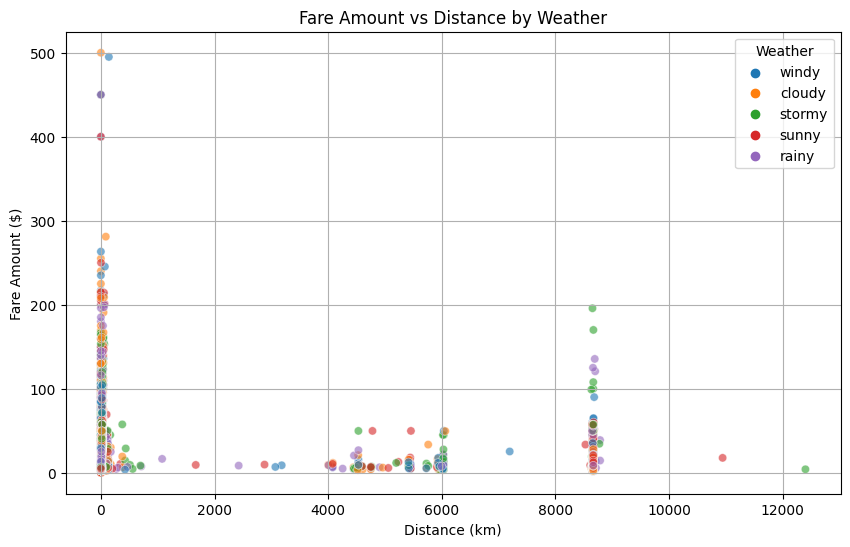

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="distance", y="fare_amount", hue="Weather", alpha=0.6)
plt.title("Fare Amount vs Distance by Weather")
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.legend(title="Weather")
plt.grid(True)
plt.show()


c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


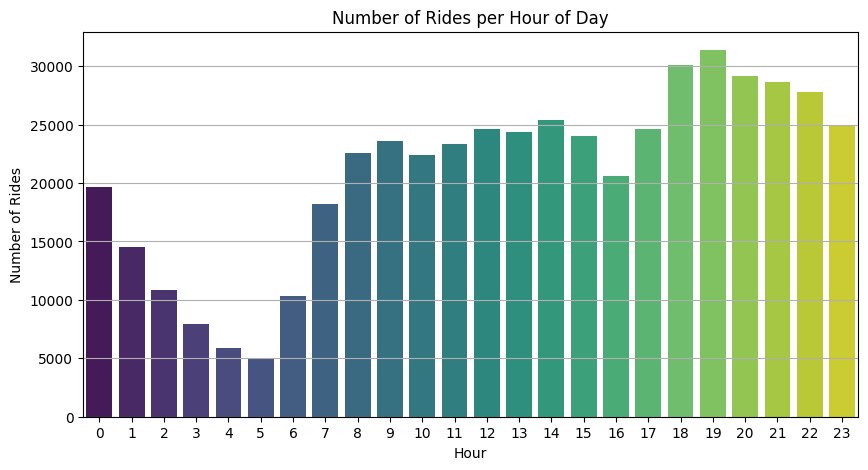

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(x="hour", data=df, palette="viridis")
plt.title("Number of Rides per Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Rides")
plt.grid(axis='y')
plt.show()


c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


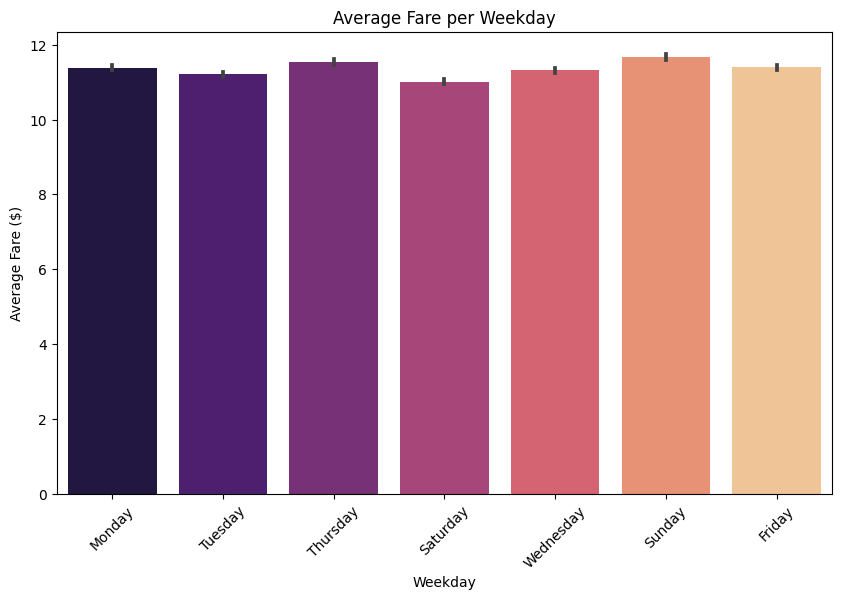

In [17]:
weekday_map = {
    0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
    4: "Friday", 5: "Saturday", 6: "Sunday"
}
df["weekday_name"] = df["weekday"].map(weekday_map)

plt.figure(figsize=(10, 6))
sns.barplot(x="weekday_name", y="fare_amount", data=df, estimator='mean', palette="magma")
plt.title("Average Fare per Weekday")
plt.xticks(rotation=45)
plt.ylabel("Average Fare ($)")
plt.xlabel("Weekday")
plt.show()


c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


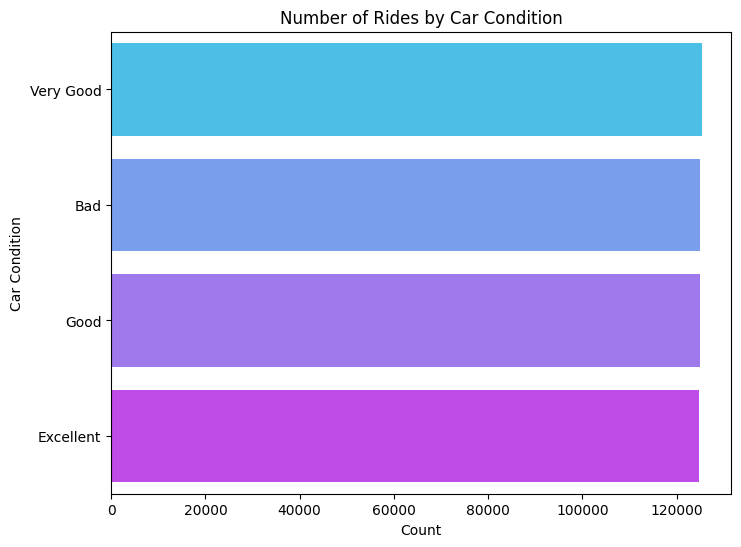

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(y="Car Condition", data=df, order=df["Car Condition"].value_counts().index, palette="cool")
plt.title("Number of Rides by Car Condition")
plt.xlabel("Count")
plt.ylabel("Car Condition")
plt.show()


c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

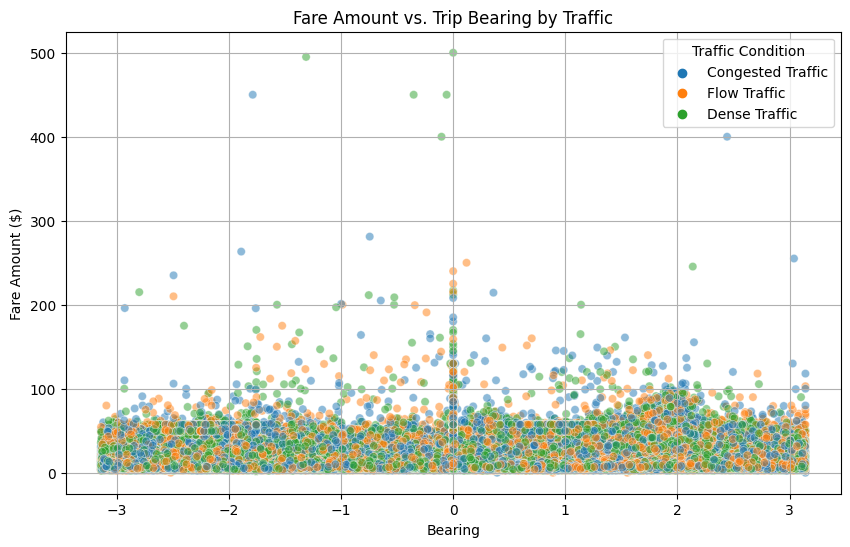

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="bearing", y="fare_amount", hue="Traffic Condition", alpha=0.5)
plt.title("Fare Amount vs. Trip Bearing by Traffic")
plt.xlabel("Bearing")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()


c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


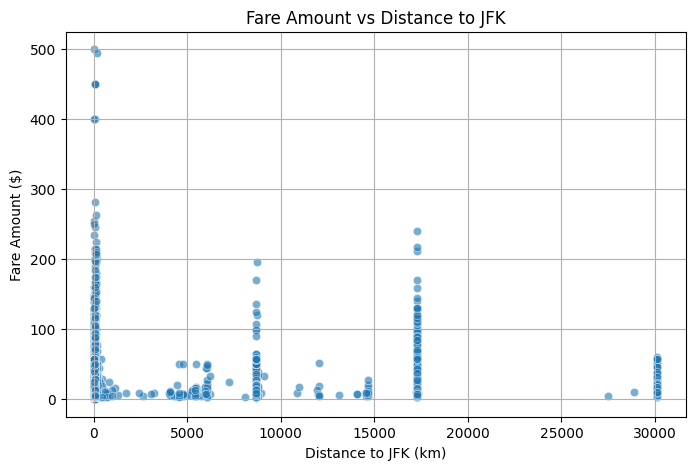

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


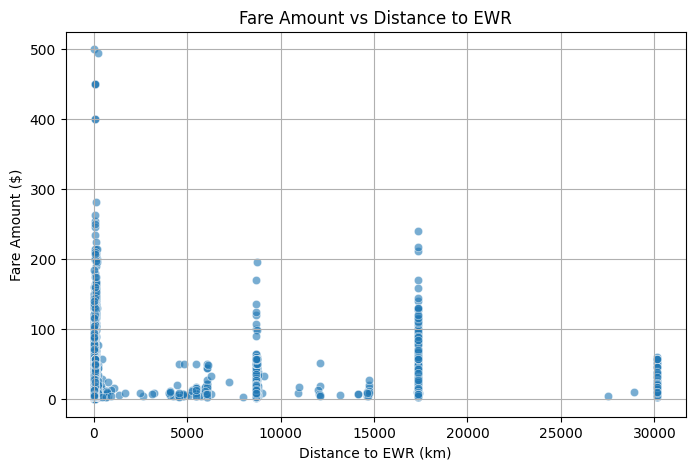

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


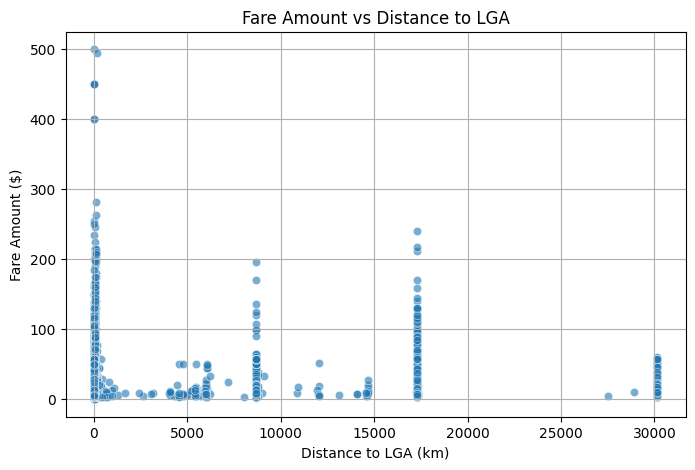

In [21]:
airports = ["jfk_dist", "ewr_dist", "lga_dist"]

for airport in airports:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[airport], y=df["fare_amount"], alpha=0.6)
    plt.title(f"Fare Amount vs Distance to {airport.upper().replace('_DIST', '')}")
    plt.xlabel(f"Distance to {airport.upper().replace('_DIST', '')} (km)")
    plt.ylabel("Fare Amount ($)")
    plt.grid(True)
    plt.show()


In [7]:
import pandas as pd

# لو مش مقريه قبل كده
# df = pd.read_csv("file.csv")

for col in df.columns:
    print("="*50)
    print(f"Column: {col}")
    print(f"Data Type: {df[col].dtype}")
    print(f"Number of Unique Values: {df[col].nunique()}")

    # لو العمود نوعه object أو عدد القيم الفريدة قليل (<20) هنعرض القيم
    if df[col].dtype == 'object' or df[col].nunique() < 20:
        print(f"Classes/Unique values: {df[col].unique()}")


Column: User ID
Data Type: object
Number of Unique Values: 500000
Classes/Unique values: ['KHVrEVlD' 'lPxIuEri' 'gsVN8JLS' ... 'QZIMcpLZ' 'AD72Uwmn' 'qGKn4Um5']
Column: User Name
Data Type: object
Number of Unique Values: 221675
Classes/Unique values: ['Kimberly Adams' 'Justin Tapia' 'Elizabeth Lopez' ... 'Monique Wade'
 'Wanda Parks' 'Dillon Jackson']
Column: Driver Name
Data Type: object
Number of Unique Values: 221700
Classes/Unique values: ['Amy Butler' 'Hannah Zimmerman' 'Amanda Jackson' ... 'Gabriel Coleman'
 'Larry Richards' 'Lonnie Santana']
Column: Car Condition
Data Type: object
Number of Unique Values: 4
Classes/Unique values: ['Very Good' 'Excellent' 'Bad' 'Good']
Column: Weather
Data Type: object
Number of Unique Values: 5
Classes/Unique values: ['windy' 'cloudy' 'stormy' 'sunny' 'rainy']
Column: Traffic Condition
Data Type: object
Number of Unique Values: 3
Classes/Unique values: ['Congested Traffic' 'Flow Traffic' 'Dense Traffic']
Column: key
Data Type: object
Number of 

In [14]:
cols_to_drop = [
    "key", "Driver Name", "pickup_datetime",
    "pickup_longitude", "pickup_latitude",
    "dropoff_longitude", "dropoff_latitude",
    "sol_dist", "nyc_dist" , "User ID" , "User Name" 
]

df_clean = df.drop(columns=cols_to_drop)


In [15]:
df_clean.head()

,Car Condition,Weather,Traffic Condition,fare_amount,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,distance,bearing
0,Very Good,windy,Congested Traffic,4.5,1,17,15,6,0,2009,20.265840,55.176046,14.342611,1.030764,-2.918897
1,Excellent,cloudy,Flow Traffic,16.9,1,16,5,1,1,2010,44.667679,31.832358,23.130775,8.450134,-0.375217
2,Bad,stormy,Congested Traffic,5.7,2,0,18,8,3,2011,43.597686,33.712082,19.865289,1.389525,2.599961
3,Very Good,stormy,Flow Traffic,7.7,1,4,21,4,5,2012,42.642965,32.556289,21.063132,2.799270,0.133905
4,Bad,stormy,Congested Traffic,5.3,1,7,9,3,1,2010,43.329953,39.406828,15.219339,1.999157,-0.502703


In [20]:
df_clean["Car Condition"].unique()


array(['Very Good', 'Excellent', 'Bad', 'Good'], dtype=object)

In [19]:
df_clean["Weather"].unique()


array(['windy', 'cloudy', 'stormy', 'sunny', 'rainy'], dtype=object)

In [18]:
df_clean["Traffic Condition"].unique()

array(['Congested Traffic', 'Flow Traffic', 'Dense Traffic'], dtype=object)

In [33]:
import pandas as pd

# نفترض أن df هو الداتا بعد التنظيف

categorical_cols = ["Car Condition", "Weather", "Traffic Condition"]

df_model = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

df_model = df_model.astype(int, errors='ignore')

df_model.head()


,fare_amount,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,...,bearing,Car Condition_Excellent,Car Condition_Good,Car Condition_Very Good,Weather_rainy,Weather_stormy,Weather_sunny,Weather_windy,Traffic Condition_Dense Traffic,Traffic Condition_Flow Traffic
0,4.5,1,17,15,6,0,2009,20.265840,55.176046,14.342611,...,-2.918897,0,0,1,0,0,0,1,0,0
1,16.9,1,16,5,1,1,2010,44.667679,31.832358,23.130775,...,-0.375217,1,0,0,0,0,0,0,0,1
2,5.7,2,0,18,8,3,2011,43.597686,33.712082,19.865289,...,2.599961,0,0,0,0,1,0,0,0,0
3,7.7,1,4,21,4,5,2012,42.642965,32.556289,21.063132,...,0.133905,0,0,1,0,1,0,0,0,1
4,5.3,1,7,9,3,1,2010,43.329953,39.406828,15.219339,...,-0.502703,0,0,0,0,1,0,0,0,0


In [35]:
df_model = df_model.dropna()


In [36]:
df_model.isnull().sum()

fare_amount                        0
passenger_count                    0
hour                               0
day                                0
month                              0
weekday                            0
year                               0
jfk_dist                           0
ewr_dist                           0
lga_dist                           0
distance                           0
bearing                            0
Car Condition_Excellent            0
Car Condition_Good                 0
Car Condition_Very Good            0
Weather_rainy                      0
Weather_stormy                     0
Weather_sunny                      0
Weather_windy                      0
Traffic Condition_Dense Traffic    0
Traffic Condition_Flow Traffic     0
dtype: int64

In [37]:
print(df_model.duplicated().sum()) 


0


## Hyperpatameter tuning and Modeling

In [39]:
X = df_model.drop(columns=["fare_amount"])
y = df_model["fare_amount"]


In [48]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [49]:
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='r2',
    verbose=2
)

In [40]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [50]:
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


KeyboardInterrupt: 

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [43]:
y_pred = model.predict(X_test)


In [ ]:
print("R^2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R^2 Score: 0.77
RMSE: 0.2
